In [11]:
import matplotlib.pyplot as plt
from numpy.random import rand
from numpy import hstack, ones, zeros

from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

# One Dimensional Generative Adversiarial Network
tutorial: https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-a-1-dimensional-function-from-scratch-in-keras/

## 1. Select a One-Dimensional Function


In [2]:
def calculate(x):
    # Choos a function that is easy to plot, like x^2.
    return x * x

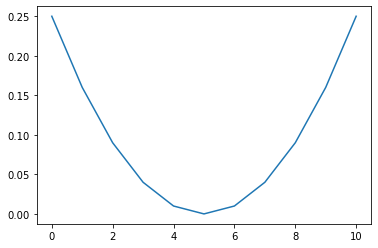

In [3]:
# Demonstrate the simple function
inputs = [-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5]
# Use calculate function to get the outputs
outputs =[calculate(x) for x in inputs]
# Plot the results
plt.plot(outputs)

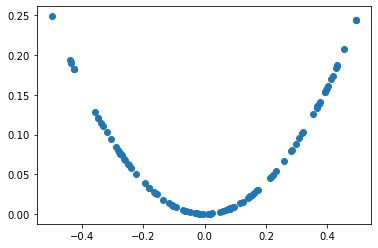

In [4]:
# Ecample of generating random samples from X^2
def generate_samples(n=100):
    # Generate random inputs between -0.5 and 0.5
    x1 = rand(n) - 0.5
    # Generate outputs for X^2
    x2 = x1 * x1
    # Stack arrays horizontally
    x1 = x1.reshape(n, 1)
    x2 = x2.reshape(n, 1)
    return hstack((x1, x2))

data = generate_samples()
# plot
plt.scatter(data[:, 0], data[:, 1])

## 2. Define a Discriminator Model


In [5]:
def define_discriminator(n_inputs=2):
    model = Sequential()
    model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [8]:
model = define_discriminator()
model.summary()
#plot_model(model)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 25)                75        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Generate n of real samples with class labels
def generate_real_samples(n=100):
    # Generate random inputs between -0.5 and 0.5
    x1 = rand(n) - 0.5
    # Generate outputs for X^2
    x2 = x1 * x1

    # Stack arrays horizontally
    x1 = x1.reshape(n, 1)
    x2 = x2.reshape(n, 1)
    X = hstack((x1, x2))

    # add class labels
    y = ones((n, 1))
    return X, y

In [14]:
# Generate n of real samples with class labels
def generate_fake_samples(n=100):
    # Generate random inputs between -1 and 1
    x1 = -1 + rand(n) * 2
    # Generate outputs for X^2
    x2 = -1 + rand(n) * 2
    
    # Stack arrays horizontally
    x1 = x1.reshape(n, 1)
    x2 = x2.reshape(n, 1)
    X = hstack((x1, x2))

    # add class labels
    y = zeros((n, 1))
    return X, y

In [7]:
# Define a Generator Model
# Training the Generator Model
# Evaluating the Performance of the GAN
# Complete Example of Training the GAN